Multi-armed badit에서 여러 정책의 성능
- 초기탐험-후기탐사 
- $\epsilon$-greedy
- UCB

Q. $\epsilon = 0$일 때 $\epsilon$-greedy의 성능이 너무 높게 나타남. rate = 0인 경우의 초기탐험-후기탐사 정책과 동일해야 함
A. visit 배열의 초기값을 1 대신 0으로 바꾸면 제대로 나옴

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def simulate_pull_bandit(handle, visit, win): # Simulate pulling the bandit arm
    visit[handle] += 1 # Increment the number of visits for the selected arm
    win[handle] += 1 if np.random.random() < arm_prob[handle] else 0 # Increment the number of wins for the selected arm
    

[0.21462269941005085, 0.228460747991653, 0.3508593323246434, 0.5057823484162476, 0.23942246549978363, 0.3013048613192445, 0.4659602935512359, 0.6337336619646459, 0.3899089816741731, 0.3535895865958699, 0.5549614569753443, 0.4379280573216625, 0.5307903090117563, 0.45864672363617703, 0.21396198411715717, 0.2405820522206082, 0.4356209766410375, 0.21045426238619025, 0.2725106383815987, 0.23044051217841943, 0.5271216052093649, 0.4267091541055211, 0.5900327260391254, 0.5598074673616613, 0.3855025381766366, 0.5217886990894844, 0.41018598263547434, 0.5311490990074239, 0.41806586193961714, 0.36421787220834057, 0.1964059886017499, 0.4509889438463236, 0.21450324387749964, 0.6476246988675671, 0.2992729213699764, 0.37187763738796986, 0.4391883056056696, 0.6077528964886593, 0.3556660278864232, 0.6477536053373154, 0.4200955655026723, 0.38240210138699454, 0.5501440794553922, 0.6387420211712942, 0.42200684628966006, 0.39468602405046366, 0.2803344942844542, 0.17814017294578727, 0.28683884960783296, 0.52

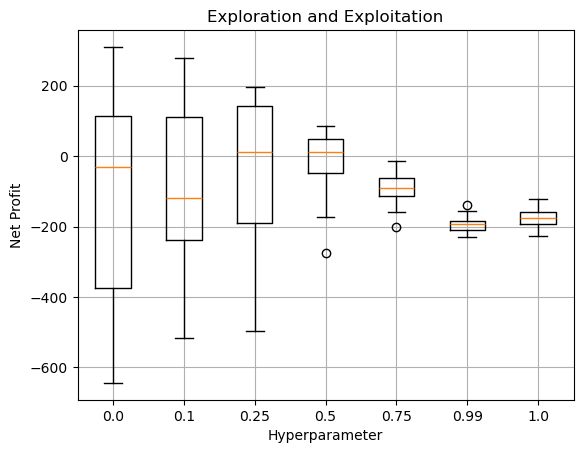

Epsilon-Greedy: [-118.6  144.8  115.3   82.2   44.2   -6.4  -35.8  -84.2 -122.9 -165.7
 -179.5]


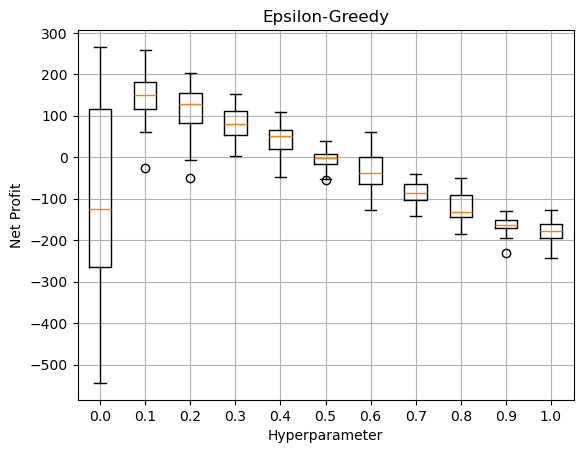

In [ ]:
def exploration_and_exploitation(rate):
    #visit = np.ones(num_arms)
    #win = np.ones(num_arms)
    visit = np.zeros(num_arms)
    win = np.zeros(num_arms)
    for t in range(int(num_pulls * rate)):
        handle = np.random.randint(num_arms)
        simulate_pull_bandit(handle, visit, win)
    p = np.array([win[i]/visit[i] if visit[i] > 0 else 0 for i in range(num_arms)])
    h = np.random.choice(np.where(p==np.max(p))[0])
    for t in range(num_pulls - int(num_pulls * rate)):
        simulate_pull_bandit(h, visit, win)
    return visit, win

def epsilon_greedy(epsilon):
    #visit = np.ones(num_arms)
    #win = np.ones(num_arms)
    visit = np.zeros(num_arms)
    win = np.zeros(num_arms)
    for t in range(num_pulls):
        if np.random.random() < epsilon:
            h = np.random.randint(0,num_arms)
        else:
            #p = np.array([win[i]/visit[i] for i in range(num_arms)])
            p = np.array([win[i] / visit[i] if visit[i] > 0 else 0 for i in range(num_arms)])
            h = np.random.choice(np.where(p==np.max(p))[0])
        simulate_pull_bandit(h, visit, win)
    return visit, win

def UCB(c):
    visit = np.ones(num_arms)
    win = np.ones(num_arms)
    for t in range(num_pulls):
        p = np.array([win[i]/visit[i] + c * np.sqrt(np.log(t+1)/visit[i]) for i in range(num_arms)])
        h = np.random.choice(np.where(p==np.max(p))[0])
        simulate_pull_bandit(h, visit, win)
    return visit, win

def box_plot_analysis(algorithm, hyper_param, alg_name):
    net_profit = []
    for param in hyper_param:
        net = []
        for k in range(num_runs):
            visit, win = algorithm(param)
            net.append(sum([2*win[i]-visit[i] for i in range(num_arms)]))
        net_profit.append(net)
    print(alg_name+':',np.mean(net_profit, axis=1))

    plt.boxplot(net_profit)
    plt.title(alg_name)
    plt.xlabel('Hyperparameter')
    plt.ylabel('Net Profit')
    plt.grid()
    plt.xticks(ticks=range(1, len(hyper_param)+1), labels=hyper_param)
    plt.show()

num_arms = 200
arm_prob = [0.4+(np.random.random()-0.5)/2 for i in range(num_arms)] # uniform over [0.15, 0.65]
num_pulls = 1000
num_runs = 50

print(arm_prob)
box_plot_analysis(exploration_and_exploitation, [0.0,0.1,0.25,0.5,0.75,0.99,1.0], 'Exploration and Exploitation')
box_plot_analysis(epsilon_greedy, [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 'Epsilon-Greedy')
box_plot_analysis(UCB, [0,0.00001,0.0001,0.001,0.01,0.1,1.0,10.0], 'UCB')


